# Wrangle & Analyze "WeRateDogs" Data

In this project, three different datasets (twitter-archive-enhanced, image-prediction, tweet-json-text) are wrangled, cleaned and merged together to obtain valuable insights and visualizations.

For each dataset, first the data is loaded into a dataframe, keeping the tweet_id as index. After this, the datasets are analyzed in order to list any data quality or tidiness issues. They are solved in the third and last phase, Data cleaning, which involves two steps: Code-to solve the issue and Test-to check whether the issue still persists even after the cleaning.

Once these phases are completed, all the three datasets are merged and three insights are found out. Visualizations are provided for some these insights.

# Dataset 1 - Twitter Archive

> Load Dataset 1:

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [471]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [472]:
twitter_archive.set_index("tweet_id", inplace = True)
twitter_archive.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


> Asses Dataset 1:

In [473]:
twitter_archive.shape

(2356, 16)

In [474]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [475]:
twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [476]:
#Checking whether index (tweet_id) is unique
twitter_archive.index.is_unique

True

In [477]:
#Count of Replies in the dataset
(twitter_archive.in_reply_to_status_id).count()

78

In [478]:
#Count of Retweets in the dataset
(twitter_archive.retweeted_status_id).count()

181

In [479]:
#Multiple URLs in same cell
(twitter_archive.expanded_urls.str.contains(',', na = False)).sum()

639

In [480]:
#These are more suitable to be placed in one column than individual columns

print('Doggo', (twitter_archive['doggo'] == 'doggo').sum() )
print ('Floofer', (twitter_archive['floofer'] == 'floofer').sum() )
print('Pupper', (twitter_archive['pupper'] == 'pupper').sum() )
print('Puppo', (twitter_archive['puppo'] == 'puppo').sum() )
print('None', twitter_archive.query(' doggo == "None" & floofer =="None" & pupper =="None" & puppo =="None" ').count()['name'])

Doggo 97
Floofer 10
Pupper 257
Puppo 30
None 1976


In [481]:
# Highest frequency of Numerator 
twitter_archive.rating_numerator.value_counts().head()

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [482]:
# Highest frequency of Denominator
twitter_archive.rating_denominator.value_counts().head()

10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64

In [483]:
# Numerator greater than denominator, need for normalized rating.
twitter_archive[twitter_archive.rating_numerator > twitter_archive.rating_denominator][['text','rating_numerator','rating_denominator']].head()

,text,rating_numerator,rating_denominator
tweet_id,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
892177421306343426,This is Tilly. She's just checking pup on you....,13,10
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
891327558926688256,This is Franklin. He would like you to stop ca...,12,10


In [484]:
# Not all rows have denominator as 10, another reason why a normalized rating is needed.
twitter_archive[twitter_archive.rating_denominator > 10][['text','rating_numerator','rating_denominator']].head()

,text,rating_numerator,rating_denominator
tweet_id,,,
832088576586297345,@docmisterio account started on 11/15/15,11,15
820690176645140481,The floofs have been released I repeat the flo...,84,70
775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
758467244762497024,Why does this never happen at my front door......,165,150
740373189193256964,"After so many requests, this is Bretagne. She ...",9,11


In [485]:
# Float numerators incorrectly mentioned.
twitter_archive[twitter_archive['text'].str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator', 'rating_denominator']].head(3)

C:\Users\Saheel\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,This is Bella. She hopes her smile made you sm...,5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10


## Data Quality & Tidiness Issues in Dataset 1 - Twitter Archive

1) Some of the tweets in the dataset are retweets.

2) Some of the tweets in the dataset are replies.

3) Timestamp should be in Date-Time format.

4) Values in name column like 'a', 'the', 'such', etc. which are irrelevant and all have lowercase characters.

5) Some tuples contain multiple URLS in the expanded_urls column.

6) Fix incorrect ratings and normalize all ratings.

## Tidiness Issues in Dataset 1 - Twitter Archive

1) To drop unnecessary columns to make dataset tidy.

2) Dog stage classification like doggo/ floofer/ pupper/ puppo should be represented in one column instead of four columns.

> Clean Dataset 1:

In [486]:
# To create a copy of the dataset
clean_twitter_archive = twitter_archive.copy()

In [487]:
# Dropping Retweets

#Code
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['retweeted_status_id'].isnull()]

#Test
print(sum(clean_twitter_archive.retweeted_status_user_id.value_counts()))

0


In [488]:
# Dropping Replies

#Code
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['in_reply_to_status_id'].isnull()]

#Test
print(sum(clean_twitter_archive.in_reply_to_status_id.value_counts()))

0


In [489]:
# Fixing timestamp datatype to date-time

#Code
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)

#Test
clean_twitter_archive.timestamp.dtypes

datetime64[ns, UTC]

In [490]:
# Dropping unwanted columns

#Code
clean_twitter_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp','source'], axis = 1, inplace = True)

#Test
clean_twitter_archive.columns

Index(['timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [491]:
# Dropping values in name column are like 'a', 'the', 'such', etc. which are irrelevant and all have lowercase characters.

sum(clean_twitter_archive.name.str.islower())

104

In [492]:
#Code
clean_twitter_archive = clean_twitter_archive[~clean_twitter_archive['name'].str.islower()]

#Test
sum(clean_twitter_archive.name.str.islower())

0

In [493]:
# Dog stage category represented in one column
# Reference - Code Snippet provided in Udacity Reviews

# Code
clean_twitter_archive.doggo.replace('None', '', inplace=True)
clean_twitter_archive.floofer.replace('None', '', inplace=True)
clean_twitter_archive.pupper.replace('None', '', inplace=True)
clean_twitter_archive.puppo.replace('None', '', inplace=True)

In [494]:
clean_twitter_archive['dog_stage'] = clean_twitter_archive.doggo + clean_twitter_archive.floofer + clean_twitter_archive.pupper + clean_twitter_archive.puppo

In [495]:
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [496]:
clean_twitter_archive.loc[clean_twitter_archive.dog_stage == '', 'dog_stage'] = np.nan

clean_twitter_archive.dog_stage.value_counts()

pupper            210
doggo              70
puppo              23
floofer             9
doggo, pupper       8
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [497]:
clean_twitter_archive.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

# Test
clean_twitter_archive.columns

Index(['timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [498]:
# Fixing multiple expanded URLs

#Code
for index, column in clean_twitter_archive.iterrows():
    clean_twitter_archive.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)

#Test
clean_twitter_archive['expanded_urls'].head()

tweet_id
892420643555336193    https://twitter.com/dog_rates/status/892420643...
892177421306343426    https://twitter.com/dog_rates/status/892177421...
891815181378084864    https://twitter.com/dog_rates/status/891815181...
891689557279858688    https://twitter.com/dog_rates/status/891689557...
891327558926688256    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

In [499]:
# Correctly adding the float numerator values

clean_twitter_archive['rating_numerator'] = clean_twitter_archive['rating_numerator'].astype(float)
clean_twitter_archive['rating_denominator'] = clean_twitter_archive['rating_denominator'].astype(float)

In [500]:
#Code
import re
fraction_ratings = clean_twitter_archive[clean_twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")].index

for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', clean_twitter_archive.loc[index,:].text).group(0)
    clean_twitter_archive.at[index,'rating_numerator'], clean_twitter_archive.at[index,'rating_denominator'] = rating.split('/')

C:\Users\Saheel\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [501]:
#Test
clean_twitter_archive[clean_twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,This is Bella. She hopes her smile made you sm...,13.50,10.0
786709082849828864,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0
680494726643068929,Here we have uncovered an entire battalion of ...,11.26,10.0


In [502]:
# Normalized rating since in some rows numerators are greater than denominators. 

#Code
clean_twitter_archive['normalized_rating'] = clean_twitter_archive['rating_numerator'] / clean_twitter_archive['rating_denominator']

#Test
clean_twitter_archive.head(2)

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,normalized_rating
tweet_id,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3


# Dataset 2: Image Predictions

>Load Dataset 2:

In [503]:
import requests

In [504]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

In [505]:
img_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [506]:
img_pred.set_index("tweet_id", inplace = True)
img_pred.head(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


> Assess Dataset 2:

In [507]:
img_pred.shape

(2075, 11)

In [508]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [509]:
img_pred.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [510]:
img_pred.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [511]:
img_pred[['p1','p2','p3']].head()

,p1,p2,p3
tweet_id,,,
666020888022790149,Welsh_springer_spaniel,collie,Shetland_sheepdog
666029285002620928,redbone,miniature_pinscher,Rhodesian_ridgeback
666033412701032449,German_shepherd,malinois,bloodhound
666044226329800704,Rhodesian_ridgeback,redbone,miniature_pinscher
666049248165822465,miniature_pinscher,Rottweiler,Doberman


In [512]:
sum(img_pred.jpg_url.duplicated())

66

In [513]:
img_pred.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False
757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False
695314793360662529,https://pbs.twimg.com/media/CaZBErSWEAEdXk_.jpg,2,Maltese_dog,0.678547,True,Lhasa,0.125046,True,Pekinese,0.048999,True


## Data Quality Issues in img_pred dataframe

1) Dog Breed prediction columns (p1,p2,p3) contain a '_' between two words

2) Drop Duplicate image URLs (66)

## Tidiness Issues in img_pred dataframe

1) Confusing column Names

> Clean Dataset 2:

In [514]:
clean_img_pred = img_pred.copy()

In [515]:
# Rename Columns
clean_img_pred.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [516]:
#Code
clean_img_pred.columns = ['image_url','image_number','1st_prediction','1st_prediction_confidence','1st_prediction_isdog','2nd_prediction','2nd_prediction_confidence','2nd_prediction_isdog','3rd_prediction','3rd_prediction_confidence','3rd_prediction_isdog']

#Test
clean_img_pred.columns

Index(['image_url', 'image_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

In [517]:
# Removing underscore from Dog Breed prediction

#Code
dog_preds = ['1st_prediction', '2nd_prediction', '3rd_prediction']

for column in dog_preds:
    clean_img_pred[column] = clean_img_pred[column].str.replace('_', ' ').str.title()

In [518]:
#Test
clean_img_pred[dog_preds].head(3)

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
666020888022790149,Welsh Springer Spaniel,Collie,Shetland Sheepdog
666029285002620928,Redbone,Miniature Pinscher,Rhodesian Ridgeback
666033412701032449,German Shepherd,Malinois,Bloodhound


In [519]:
# Remove duplicate Image URLs
clean_img_pred.image_url.duplicated().sum()

66

In [520]:
#Code
clean_img_pred.drop_duplicates(subset=['image_url'], keep='last', inplace=True)

#Test
sum(clean_img_pred['image_url'].duplicated())

0

# Dataset 3 - Tweet Json

> Load Dataset 3:

In [521]:
import tweepy
import json 
import re

### Loading using Twitter API

In [522]:
# References: http://docs.tweepy.org/en/latest/api.html,
#            https://stackoverflow.com/questions/26075001/error-with-tweepy-oauthhandler

consumer_key = 'EMPTIED'
consumer_secret = 'EMPTIED'
access_token = 'EMPTIED'
access_secret = 'EMPTIED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [523]:
# Reference: https://realpython.com/python-json/

**After the above step,firstly, we get all tweet ids from tweet archive dataset**

twitter_ids = list(twitter_arcive.tweet_id.unique())

**Secondly, we save the gathered data to a file**

with open("tweet-json.txt", "w") as file: for ids in twitter_ids: print(f"Gather id: {ids}") try:
        tweet = api.get_status(ids, tweet_mode = "extended")
        json.dump(tweet._json, file)
        file.write('\n')
    except Exception as e:
        print(f"Error - id: {ids}" + str(e))
        
**Lastly, we open the saved file and load data into a data frame**

In [524]:
with open('tweet-json.txt') as f:
    tw_json = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

In [525]:
tw_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Loading dataset using .txt file

In [526]:
with open('tweet-json.txt') as f:
    tw_json = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

In [527]:
tw_json.columns = ['tweet_id', 'favorites', 'retweets']

In [528]:
tw_json.set_index('tweet_id', inplace=True)

tw_json.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


> Assess Dataset 3:

In [529]:
tw_json.shape

(2354, 2)

In [530]:
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


In [531]:
tw_json.describe()

,favorites,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


In [532]:
tw_json.index.is_unique

True

In [533]:
tw_json.favorites.isnull().sum()

0

In [534]:
tw_json.retweets.isnull().sum()

0

> Here, there doesn't seem to be any specific data quality or tidiness issues which could be further improved or modified.

# Merging Datasets :

In [535]:
from functools import reduce

df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [clean_twitter_archive, clean_img_pred, tw_json])

In [536]:
df.shape

(1809, 21)

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1809 entries, 892420643555336193 to 666020888022790149
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   timestamp                  1809 non-null   datetime64[ns, UTC]
 1   text                       1809 non-null   object             
 2   expanded_urls              1809 non-null   object             
 3   rating_numerator           1809 non-null   float64            
 4   rating_denominator         1809 non-null   float64            
 5   name                       1809 non-null   object             
 6   dog_stage                  281 non-null    object             
 7   normalized_rating          1809 non-null   float64            
 8   image_url                  1809 non-null   object             
 9   image_number               1809 non-null   int64              
 10  1st_prediction             1809 non-null 

In [538]:
df.describe()

,rating_numerator,rating_denominator,normalized_rating,image_number,1st_prediction_confidence,2nd_prediction_confidence,3rd_prediction_confidence,favorites,retweets
count,1809.000000,1809.000000,1809.000000,1809.000000,1809.000000,1.809000e+03,1.809000e+03,1809.000000,1809.000000
mean,12.192250,10.414041,1.174716,1.204533,0.595621,1.333064e-01,5.977066e-02,8481.216142,2559.896628
std,43.172795,6.014404,4.266343,0.559671,0.274500,1.008411e-01,5.095575e-02,11430.145744,4232.972030
min,0.000000,7.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,10.000000,10.000000,1.000000,1.000000,0.359843,5.284950e-02,1.546070e-02,2025.000000,634.000000
50%,11.000000,10.000000,1.100000,1.000000,0.588230,1.153490e-01,4.896790e-02,4004.000000,1333.000000
75%,12.000000,10.000000,1.200000,1.000000,0.855552,1.939050e-01,9.124110e-02,10804.000000,3014.000000
max,1776.000000,150.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


In [539]:
df.head(3)

,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,normalized_rating,image_url,image_number,...,1st_prediction_confidence,1st_prediction_isdog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_isdog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_isdog,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328


In [540]:
df.to_csv('twitter_archive_master.csv')

# Insights and Visualizations

In [541]:
# Insight 1: What is the year-wise distribution of tweets posted by the twitter account?

insight1 = df['timestamp'].groupby(df.timestamp.dt.year).agg('count')
insight1

timestamp
2015    587
2016    884
2017    338
Name: timestamp, dtype: int64

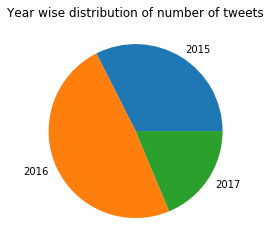

In [542]:
insight1.plot(kind='pie', y='insight1');
plt.ylabel('');
plt.title('Year wise distribution of number of tweets');

> Out of the mentioned years (2015, 2016, 2017) in the final dataset, we can observe that the most number of tweets were posted in the year 2016 and least in the year 2017.

In [543]:
# Insight 2 - How the dogs in the dataset can be categorized based on the dog stage?

insight2 = df.copy()

insight2 = insight2.dog_stage.value_counts()
insight2

pupper            188
doggo              57
puppo              21
floofer             7
doggo, pupper       6
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

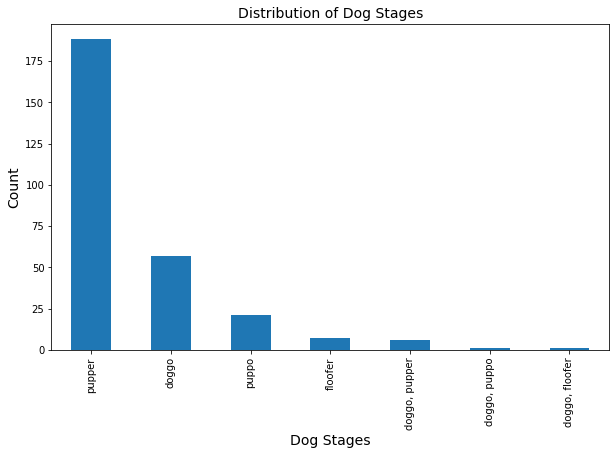

In [544]:
insight2.plot(kind='bar', figsize=(10,6));
plt.xlabel('Dog Stages', size=14);
plt.ylabel('Count', size=14);
plt.title('Distribution of Dog Stages', size=14);

> Majority of the dogs in the final dataset, belonged to 'Pupper' stage. However, the values for this column are available only for 281 tuples. Therefore, more data is required to give a better distribution. 

In [545]:
# Insight 3 - What is the comparison between mean favorite tweets with respect to predictions in ‘1st_prediction_isdog’ column?

insight3 = df.copy()

insight3_1 = insight3[insight3['1st_prediction_isdog'] == True]
print('Mean of tweets marked as favorites when the first dog prediction was correct ', insight3_1['favorites'].mean())

Mean of tweets marked as favorites when the first dog prediction was correct  8959.775707898658


In [546]:
insight3_2 = insight3[insight3['1st_prediction_isdog'] == False]
print('Mean of tweets marked as favorites when the first dog prediction was incorrect ', insight3_2['favorites'].mean())

Mean of tweets marked as favorites when the first dog prediction was incorrect  7105.997858672376


> The above results show that the mean favorite tweets in which dogs were correctly predicted are HIGHER in comparison to the ones where dogs were incorrectly predicted.

# Conclusions:

Like the above, many other insights could be found out from this dataset wrangled from multiple sources. However, to obtain better, accurate insights, more statistical and categorical data relevant to tweets or dogs would be needed, since during data cleaning phase lots of raw data gets removed due to inconsistencies.